In [3]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import scipy.cluster.hierarchy as sch
import pylab
import scipy
import matplotlib.pyplot as plt

# Add the ptdraft folder path to the sys.path list
sys.path.append('../src/')
import data_config as dc
reload(dc)


Reading
Reading


<module 'data_config' from '../src/data_config.pyc'>

In [4]:
wd = dc.kato.data()

In [77]:
import katotools as kt
derivs = kt.integrated('deltaFOverF')


Now we can plot

In [67]:
# Recalculating everything again is messy, I know. I'll change it
cross_correlations = derivs.cross_correlations(global_ns=True)
groupings = derivs.neuron_pairings
cross_correlations

{(0,
  0): array([[ 3.40247023,  3.40720561,  3.15024137,  3.14059643,  3.1789175 ,
          3.38290782,  3.29220127,  3.20470024,  3.32771556,  3.25175416,
          3.34653036,  3.26959836,  3.38995048,  3.42420203,  2.97272843,
          3.05031396,  3.06208707,  3.28995218,  3.38186197,  3.13986247],
        [ 3.40720561,  5.06294337,  2.84951352,  2.88772948,  2.90077213,
          3.46344123,  4.6293035 ,  3.81789173,  3.19807099,  2.99023138,
          3.00957632,  3.05194124,  3.26591064,  4.04658384,  2.61149913,
          2.75104693,  2.68937138,  2.96789231,  3.50995553,  2.71737645],
        [ 3.15024137,  2.84951352,  5.50305827,  5.3958193 ,  5.40099059,
          3.07817745,  2.38479039,  4.86591492,  3.3911619 ,  5.71568375,
          3.80060709,  3.47094332,  3.34405408,  2.58958021,  5.32361672,
          5.45763479,  5.47366146,  5.74525625,  4.81946509,  4.74156842],
        [ 3.14059643,  2.88772948,  5.3958193 ,  5.38527661,  5.35039989,
          3.06981521,  2.

In [68]:
linkages = {}
indexes = {}
for i in groupings:
    D = cross_correlations[i]
    Y = sch.linkage(D, method='centroid')
    linkages[i] = Y  
    indexes[i] = sch.leaves_list(Y)

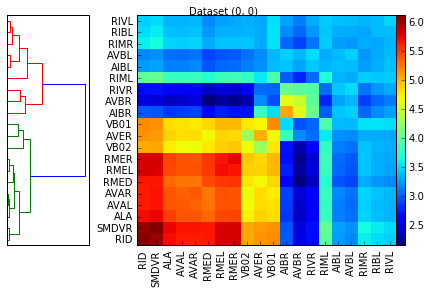

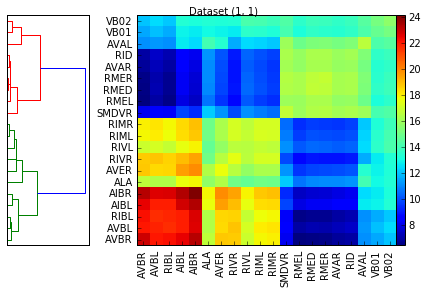

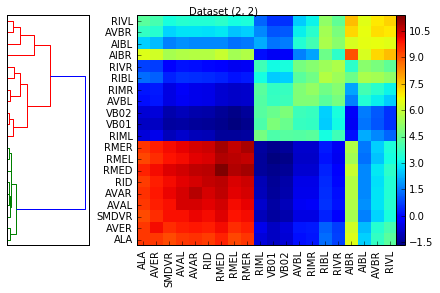

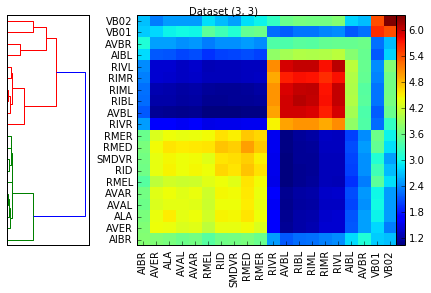

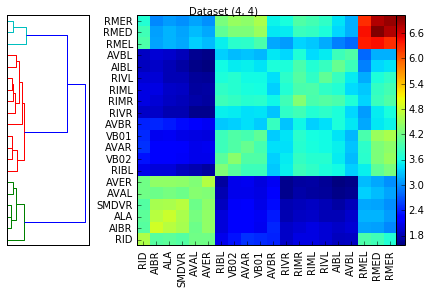

In [69]:
%matplotlib inline
import os
if not os.path.exists('./Dendrogram'):
    os.mkdir('./Dendrogram')

for i in [(n,n) for n in range(5)]: #in [(j,j) for j in xrange(5)]:
    D=cross_correlations[i]
    
    # Compute and plot dendrogram.
    fig = plt.figure()
    fig.suptitle('Dataset {0}'.format(i))

    axdendro = fig.add_axes([0.00,0.15,0.19,0.8])
    Y = sch.linkage(D, method='centroid')
    Z = sch.dendrogram(Y, orientation='right', labels = derivs.global_neurons, ax=axdendro)
    
    # Plot distance matrix.
    axmatrix = fig.add_axes([0.3,0.15,0.6,0.8])
    index = Z['leaves']
    D = D[index][:,index]
    im = axmatrix.matshow(D, aspect='auto', origin='lower')
    axdendro.set_yticks([])
    axdendro.set_xticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.9,0.15,0.02,0.8])
    pylab.colorbar(im, cax=axcolor)

    ticks = np.array(derivs.global_neurons)[index]
    xticks = np.arange(0,len(ticks))
    yticks = np.arange(0,len(ticks))

    axmatrix.set_yticks(yticks, minor=False)
    axmatrix.set_yticklabels(ticks, minor=False)
    axmatrix.yaxis.set_ticks_position('left') 



    axmatrix.set_xticks(xticks, minor=False)
    axmatrix.set_xticklabels(ticks, minor=False, rotation='vertical')
    axmatrix.xaxis.set_ticks_position('bottom') 

    # Display and save figure.
    fig.savefig('Dendrogram/dendrogram-{0}.png'.format(i))

In [86]:
data = kt.integrated('deltaFOverF')

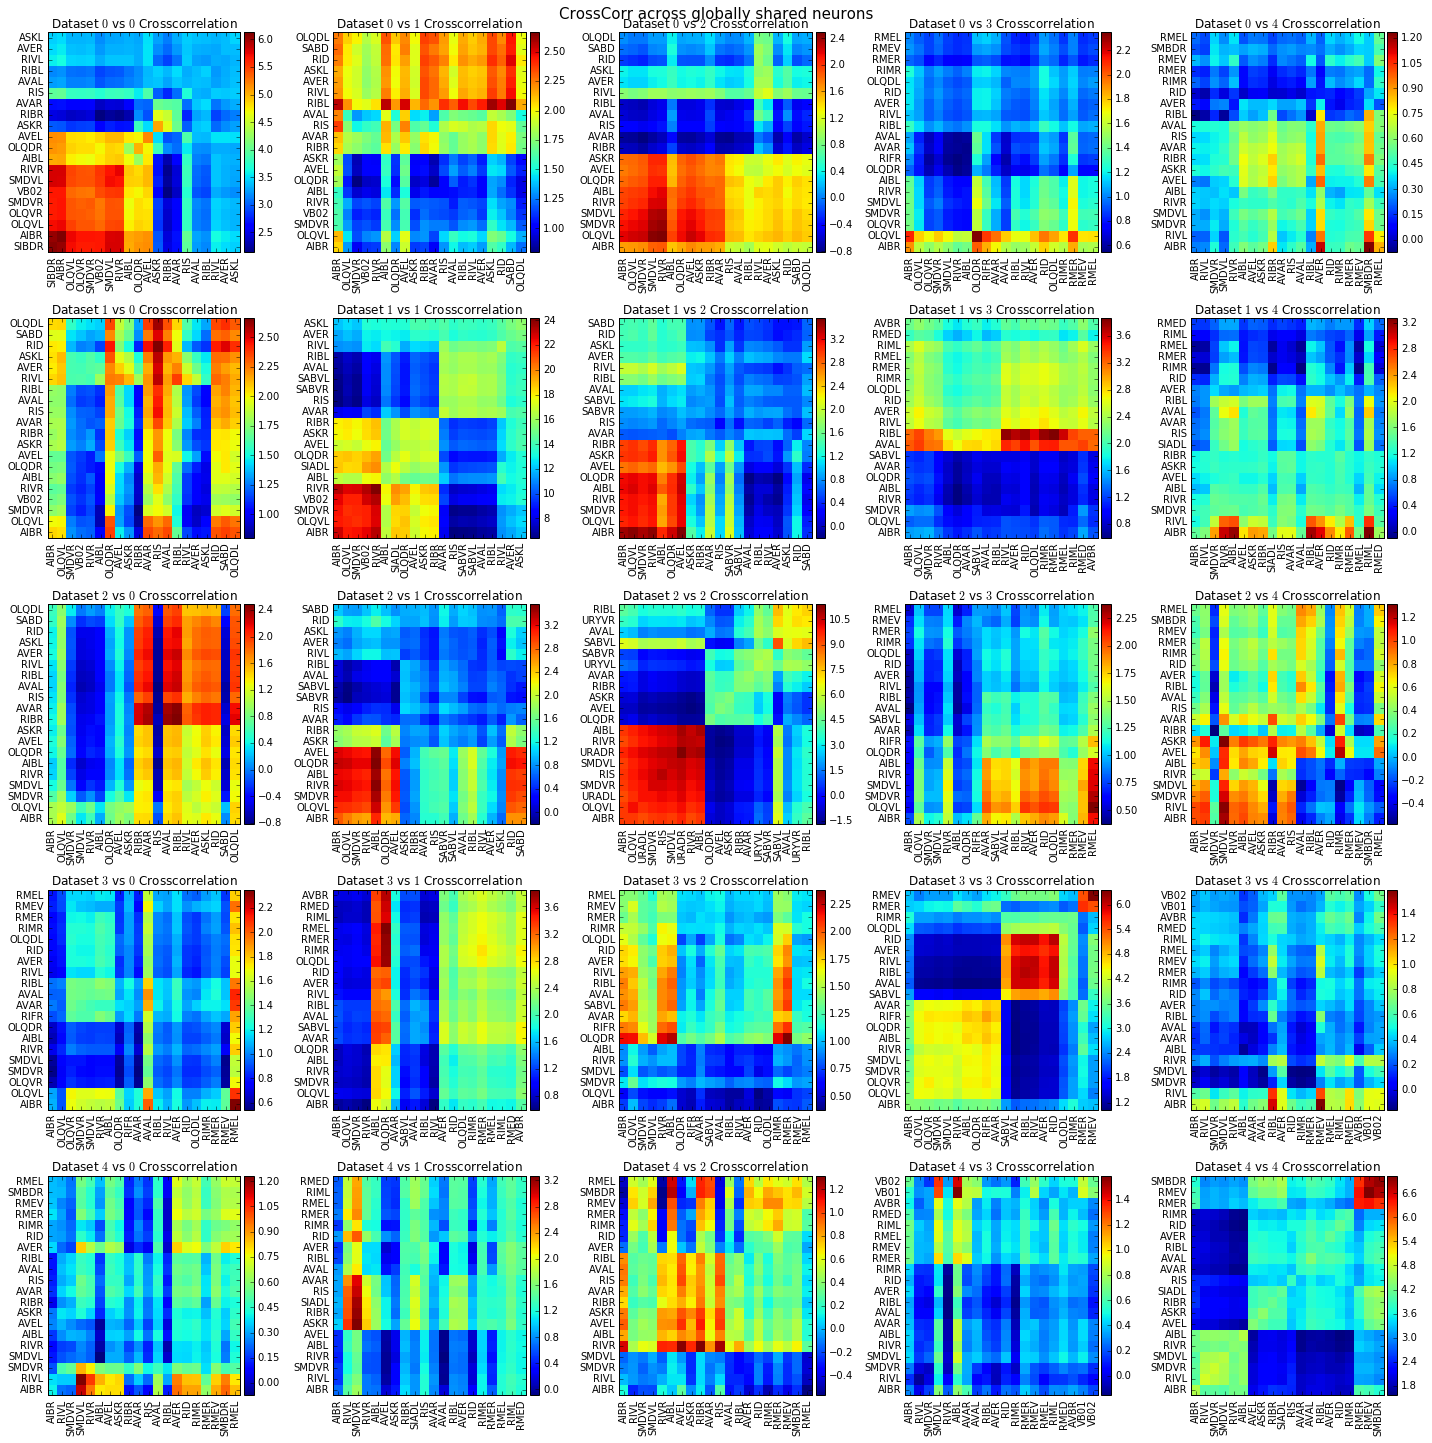

In [87]:
%matplotlib inline

import dimensions_kit as dk
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import graphing as graph
import numpy as np

dimensions=(5,5)


from itertools import *
pairings = [ i for i in product(range(5), range(5))]

def plot_crosscorrelations(title, dataset,global_ns=False):
    data = kt.integrated(dataset)
    cross_correlations = data.cross_correlations(global_ns=global_ns)
    
    def draw((x,y), axes, f, plot):
        correl = cross_correlations[(x,y)]
        Z = sch.linkage(correl, method='centroid')
        indexs = sch.leaves_list(Z)
        
        axis = axes[x][y]
                        
        neurons = data.local_neurons[(x,y)]
        ticks = neurons
        
        xticks = np.arange(0,len(ticks))+0.5
        yticks = np.arange(0,len(ticks))+0.5
        
        axis.set_yticks(yticks, minor=False)
        axis.set_yticklabels(ticks, minor=False)
        
        axis.set_xticks(xticks, minor=False)
        axis.set_xticklabels(ticks, minor=False, rotation='vertical')
        
        pc = axis.pcolormesh(correl[indexs][:,indexs])
        
        div = make_axes_locatable(axis)
        cax = div.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(pc, cax=cax)
        
        axis.set_title('Dataset ${0}$ vs ${1}$ Crosscorrelation'.format(x,y))
        axis.axis('tight')
    
    f, axes = graph.plot_grid(draw, dims=dimensions, include=groupings)
    f.suptitle(title, fontsize=15,x=0.5,y=1)
    f.tight_layout()
    f.set_size_inches(20, 20, forward=True)


    
plot_crosscorrelations('CrossCorr across globally shared neurons', 
                       'deltaFOverF', global_ns=True)
plt.savefig('/Users/akivalipshitz/Desktop/CrossCorr-Global.jpg')


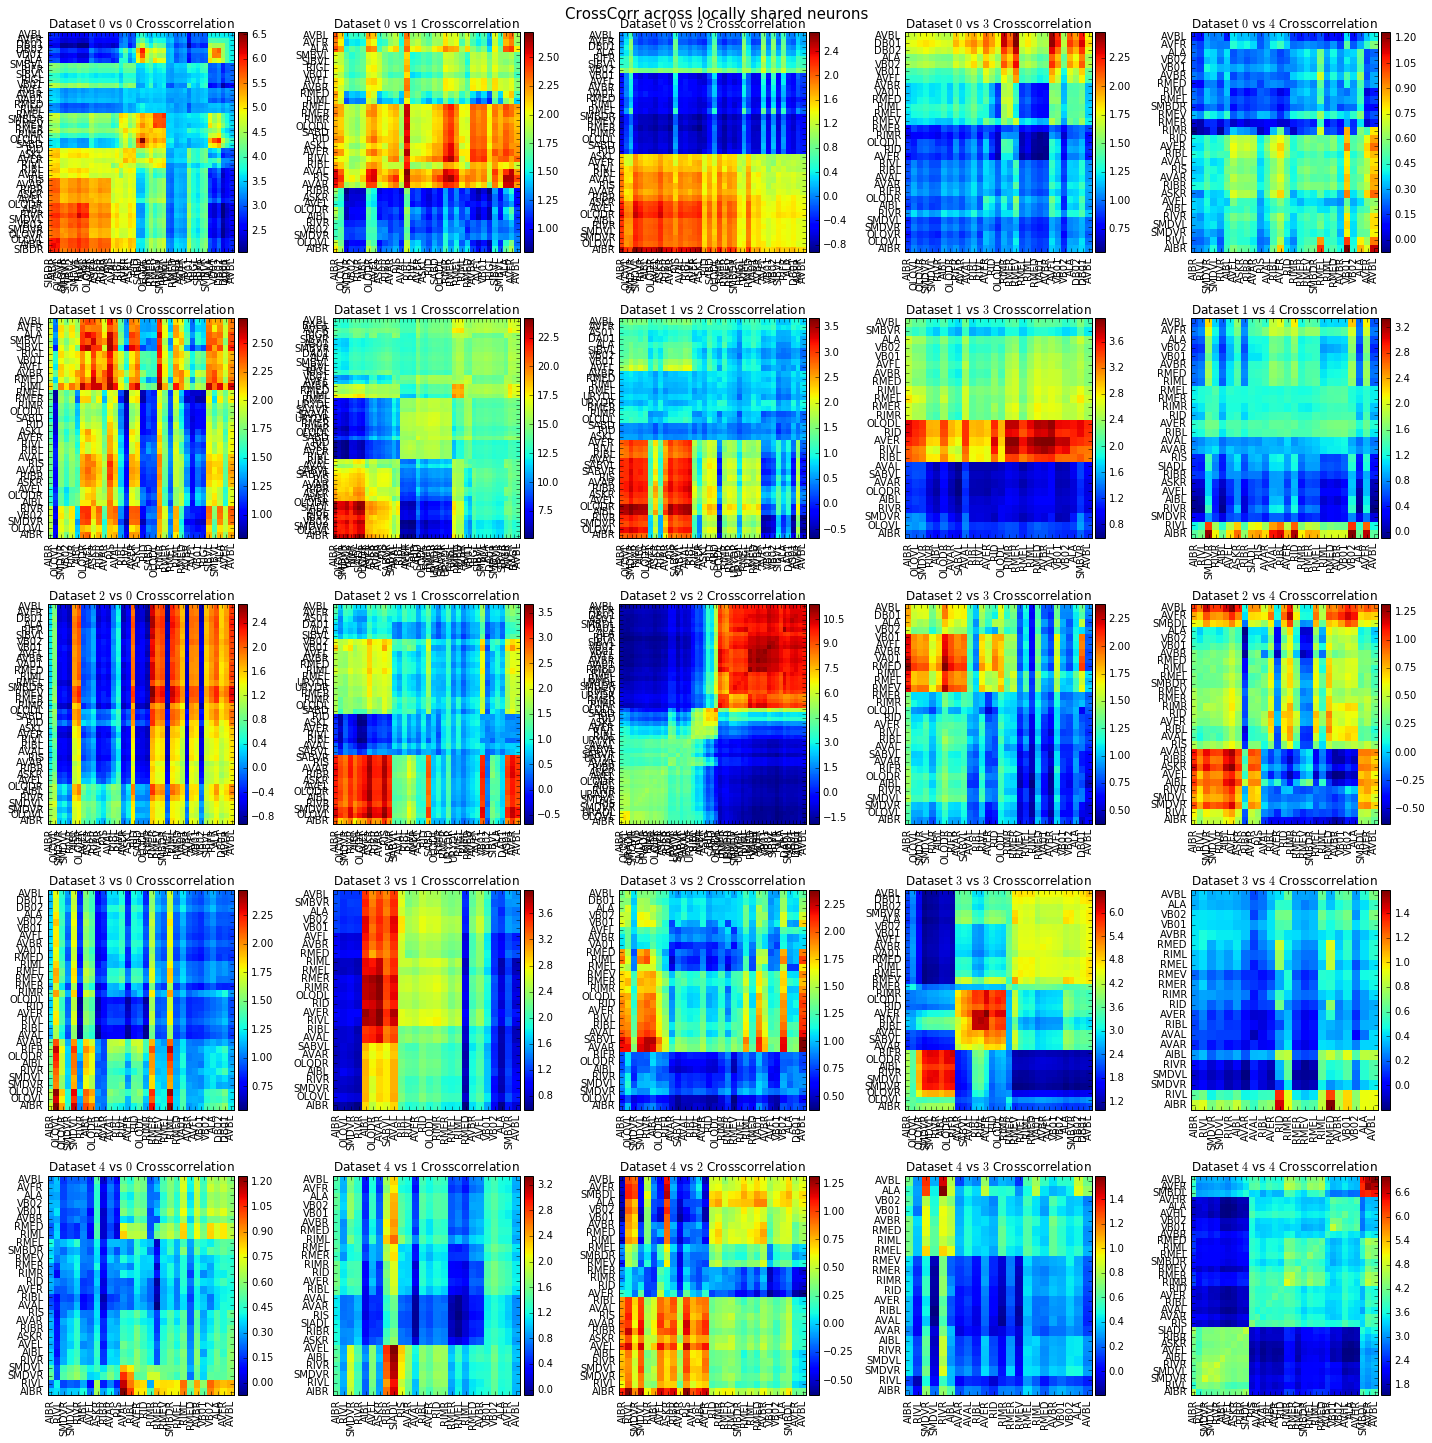

In [89]:
plot_crosscorrelations('CrossCorr across locally shared neurons', 'deltaFOverF')
plt.savefig('/Users/akivalipshitz/Desktop/CrossCorr-Local.jpg')

I haven't much experienc with ML/Stats so it will take a while until I'll just be able to sit down and start writing analysis code and even longer until I can implement all the technical stuff myself – but the growth curve is exponential in which case I expect I'll start becoming fluent in a few weeks from now (considering my daily progress for the past few days). 

After generating the crosscorrelations, I think it would be nice to just visualize them all on the same plane and see what the clusters look like

We should write the linked matrices to disk so they do not need to be recomputed every time. We should also write the correlation matrices to the disk so they too need not be recomputed every time. 

In [ ]:
import katotools as kt
wormdata = kt.integrated('deltaFOverF')
gt = wormdata.global_timeseries()


In [ ]:

%matplotlib inline
import data_config as dc
wormData = dc.kato.data()
from mpl_toolkits.axes_grid1 import make_axes_locatable

import dimensions_kit as dk
dimensions=(3,2)
def plot_shared_datasets(dataset):
    data = kt.integrated(dataset).global_timeseries()
    f, axes = plt.subplots(*dimensions,figsize=(20,20))
    f.suptitle('Clustered {0} Timeseries'.format(dataset), fontsize=20)

    for n in range(len(data)):
        x,y = dk.transform(dimensions,n)

        axis = axes[x][y]
        
        indexs = np.array(indexes[(n,n)])
        
        plotting = data[n].timeseries[indexs]
        
        pc = axis.pcolormesh(plotting, vmin=-0.2, vmax=1.5)
        
        # Dealing with the colorbar
        div = make_axes_locatable(axis)
        cax = div.append_axes("right", size="2%", pad=0.05)
        cbar = plt.colorbar(pc, cax=cax)
        
        # Setting yticks for easy identification
        yticks = np.array(data[n].nnames)[indexs]
        axis.set_yticks(np.arange(len(yticks))+0.5, minor=False)
        axis.set_yticklabels(yticks, minor=False)
        
        # Setting xticks
        xticks = wormData[n]['tv'][0]
        axis.set_xticks(np.linspace(0, 3500,num=10))
        axis.set_xticklabels(np.around(np.array(axis.get_xticks())*0.34460753/60,decimals=2))
        
        axis.set_title('Dataset ${0}$ {1}'.format(n,dataset))
        axis.set_ylabel('Neuron')
        axis.set_xlabel('Time (minutes)')
        axis.axis('tight')
        print 'generating'
    axes[2,1].axis('off')
    
plot_shared_datasets('deltaFOverF')
plt.savefig('/Users/akivalipshitz/Desktop/shared_datasets.jpg',dpi=200)

### Graph Clustering
Before using deeper quantitative/statistica routines on the data – such as looking at nonlinearities,markvo matrices, advanced signal clustering, I thought it would be interesting to create not a connectivity graph, but a functional connectivity graph among the neurons and then compare the functional graphs to the static graphs – or something of the sort. 

I don't have the scipy-expertise, nor the linear algebra expertise to write my own clustering algorithm without first playing around with the area a bit more, but I do know I can cluster using the spring-layout algorithm just to start out. 

So now I'm going to use networkx to plot a connectivity graph for the connection between neurons 1,3. 

In [23]:
adjacency = cross_correlations[(1,1)]
adjacency[np.abs(adjacency)<0.015]=0

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


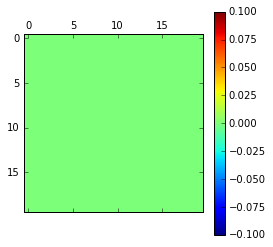

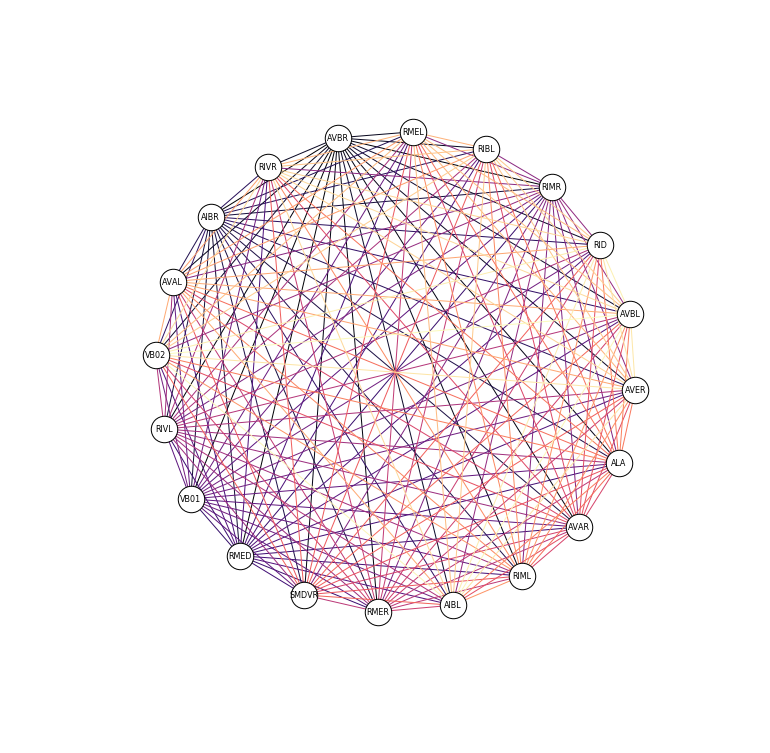

In [24]:
# We can represent neuron connectivity as a graph, with edge weights being the strength
# of correlation between two neurons. We can change the metric to cross_correlation, etc. 

# It would be nice to have a library of arbitary graph clustering algorithms implemented
# for clustering any adjacency matrix. 
import networkx as nx
%pylab
%matplotlib inline
global_neurons = derivs.global_shared()
# def normalized(a, axis=-1, order=2):
#     l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
#     l2[l2==0] = 1
#     return a / np.expand_dims(l2, axis)

adjacency = cross_correlations[(1,1)]
adjacency==0
matshow(adjacency)
colorbar()
figure()
G = nx.Graph()
G.add_nodes_from(global_neurons)
for i in range(adjacency.shape[0]):
    for j in range(adjacency.shape[1]):
        G.add_edge(global_neurons[i], global_neurons[j], weight=adjacency[i,j])

        
colors=range(len(G.edges()))
plt.figure(figsize=(10,10))
pos=nx.spring_layout(G,scale=2)

x = nx.draw(G,
       pos=pos,
       with_labels=True, 
       node_size=700,
       font_size=8,
       edge_cmap=plt.cm.magma,
       edge_color=colors,
       node_color='w')

In [15]:
points = np.array([v for k,v in pos.iteritems()]).T

We can plot the points:

In [16]:
plt.figure(figsize=(10,10))
nnames = pos.keys()
plt.scatter(points[0],points[1])

for n in range(len(nnames)):
    plt.annotate('%s'%nnames[n], [points.T[n][0], points.T[n][1]], textcoords='offset points')


/Library/Python/2.7/site-packages/matplotlib/text.py:2046: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


While it would be scientifically advantageous to look at all the graphs, for the time being let's stay with the connectivity graph for datasets 1,3. 

The two things that stand out for me are RIMR and RIML having strong correlations and AVAL having strong correlations.

When I figure out how to get the networkx spring_layout algorithm not to place neurons on top of eachother it will be easier to look at those highly clustered areas. 

In [ ]:

%matplotlib tk

# Now we need to generate a set of points in 3d space for one crosscorrelation
data = cross_correlations[(3,3)]

xx = np.arange(data.shape[0])
yy = np.arange(data.shape[1])

points = np.array([ [x,y,data[x,y]] for x in xx for y in yy])
X = points
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(points[:,0],points[:,1],points[:,2])
plt.show()

# from sklearn.cluster import AffinityPropagation
# af = AffinityPropagation(preference=-50).fit(points)
# cluster_centers_indices = af.cluster_centers_indices_
# n_clusters_ = len(cluster_centers_indices)
# labels = af.labels_

# import matplotlib.pyplot as plt
# from itertools import cycle

# plt.close('all')
# plt.figure(1)
# plt.clf()

# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# for k, col in zip(range(n_clusters_), colors):
#     class_members = labels == k
#     cluster_center = X[cluster_centers_indices[k]]
#     plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=14)
#     for x in X[class_members]:
#         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()


4/8/16 We've just succeeded in plotting timeseries for all globally shared neurons across all deltaFOverF_derivs. This was a few hours work, just to extract, sort and plot the data. Took quite a bit of fiddling to make the yticks work, but the end result was well worth the effort. Nevertheless, we still need to get rid of that ugly whitespace. I'm not sure how that can be accomplished. 

The next step, even before implementing FCA, is using sklearn to cluster our time series. I did a little bit of reading and discovered the affinity-propagation algorithm. It turns out sklearn has a good implementation of it. Let me note here two things: 

1. How important being aware of which data-analysis techniques exist
2. Developing the expertise to really understand them, to understand how they perform on different types of datasets, what they unique bring to the table, etc. 
The alternative is markov clustering, which I'll need to do a little more reading about. When I get to it, here is the wikipedia link: https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo. And here's the link for affinity-propogation (it's a message passing algorithm, https://en.wikipedia.org/wiki/Affinity_propagation)

So – let's start with copying over the code from sklearn and then maybe moving on to more sophistocated handwritten analysis. 

Cross correlations are essentially linear convolutions - i.e. linear combinations of two functions, though here we didn't do a delay. 


### Clustering
*do we need to subtract time derivatives from the data to do a "sliding window" cross correlation?*
If you look at the images above, you'll notice even though cross correlation should describe causal relationships between signals, the causal relationships are fairly inconsistent amond the datasets visually, though there are some boxlike regions. **Once you cluster, things might become clearer.** 

Covariance and Cross Correlation are both linear combinations of two signals. Just like with PCA, a lot of the nonlinear information is lost (**would be interesting to quantify precisely how much information is lost**). So after doing some research, I discovered this: https://www.researchgate.net/post/how_can_I_find_the_cross-correlation_between_two_time_series_atmospheric_data – we should look for [partial] mututal information. 

### Taking Advantage of the Datasets
Though I haven't studied fourier transforms in depth, it'd be interesting to take a quantitative look on how information travels through neural networks by jumping onto a forward signal and then being taken off the signal by some downstream neuron: here is a good tutorial on FTs: http://www.di.fc.ul.pt/~jpn/r/fourier/fourier.html. 

### Extending this
After running our cross correlation, there are a few ideas that come to mind: 

- General clustering of neurons in all these measures: cross correlation, PCA, etc. Clustering for different properties
- Functional clustering algorithm
- **Developing new algorithm to take connectivity into account**
- Developing new metrics for more detailed information flow/computational functions of neurons and starting out with plotting them
- Running monte carlo simulations on the different computational building blocks – (this is an idea I've had for a while) and then look for these dynamic patterns in our dynamic data. 
- Monte Carlo neuron annealing based on some heuristic and predicting what will happen with bayesian inference. 
- Using Machine learning to learn nonlinear parameter metrics and which directions go downwards to parameterize C Elegans. 
- Particle swarm optimization: https://en.wikipedia.org/wiki/Particle_swarm_optimization
- Percolation theory

There are many different perspectives on the data – the important thing is getting true insight and not running different procedures for their own sake. 

One interesting algorithm, which motivated this notebook in the first place, was Sarah Feldt's FCA paper. It is a different perspective on the same data that Kato used. The difference here is we aren't looking at global patterns, but at information flow through functional structure. Nevertheless, what scares me is all these techniques use linear metrics yet the data is **highly nonlinear**. The linear metrics do give a good linear approximation and I'm not sure what the error would be if the metrics weren't linear, but I'm wondering how we can become more exact. 

### Fourier Transforms

Just to feel like I've really gotten into numerical analysis, I'm going to run a standard FFT on my time series. I'm doing this without deeply understanding the algorithm because *first experiment* then *understand*. Or after the biblical maxim *aharei hapiulot nimshehet halevavot*.

Here's what numpy says about fourier analysis: 

> Fourier analysis is fundamentally a method for expressing a function as a sum of periodic components, and for recovering the function from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey [CT]. Press et al. [NR] provide an accessible introduction to Fourier analysis and its applications.

We are really doing to use the discrete version (DFT) using *difference equations* somewhre (thanks Knuth and Concrete Mathematics) but the ideas are the same.

$A_k=\sum_{m=0}^{n-1}a_m\exp\begin{Bmatrix}-2\pi i\frac{mk}{n}\end{Bmatrix}\ k=0,...,n-1$

If you'll notice this is really the sover every point. The discrete version would be an integral. 

If you've encountered Euler's formula before you'll understand this equation. We know from Euler (and the proof is with Taylor expansions of $sin(x)$ and $cos(x)$ that $e^{ix}=cos(x)+isin(x)$. Without full expertise in the math-theoretic details, I know the left side of the equation yields oscillatory behavior from the special case of Euler's formula $e^{i\pi}=-1$. Taking the square root of both sides yields i: $e^{i\frac{\pi}{2}}=i$, which we know when raised to the $x^{th}$ power os oscillatory. Hence $\exp\begin{Bmatrix}^{ix\frac{\pi}{2}}\end{Bmatrix}$ is oscillatory (thanks to Dov Greenwood for explaining to me this morning what Taylor series are and how they can be used to prove Euler's formula; the brilliance isn't the proof at all. It's the mind which made the observation)

Adding up the different waves is the basis of fourier transforms, a really beautiful topic in pure and numerical maths. 

So let's start fouriering

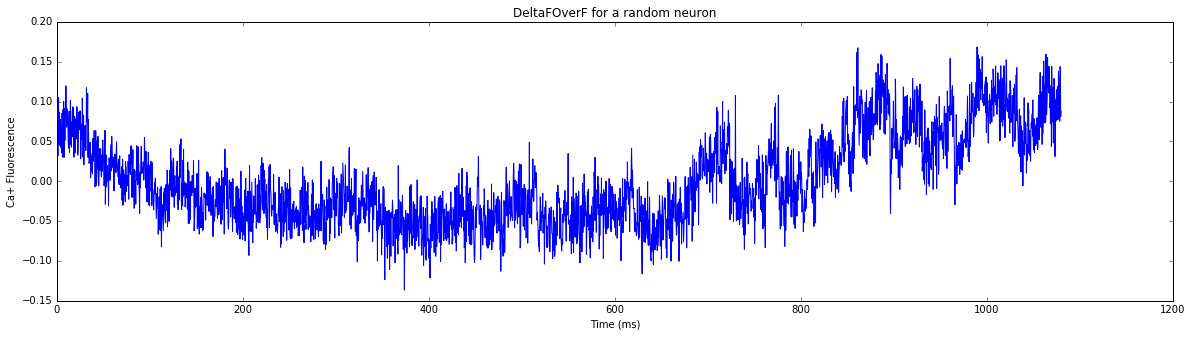

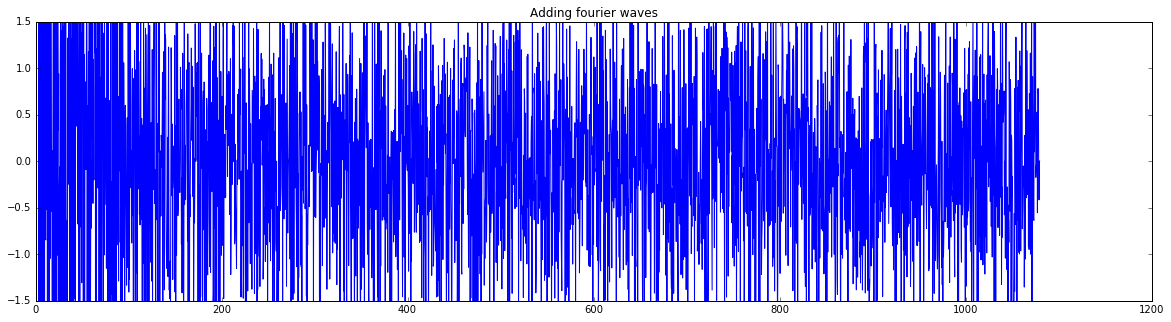

In [14]:
#lets do this ft thinga majing
import scipy.fftpack

timeseries = wormData[0]['deltaFOverF'][34]
x = wormData[0]['tv'][0]

N=x.shape[0]

plt.figure(figsize=(20,5))
plt.title('DeltaFOverF for a random neuron')
plt.ylabel('Ca+ Fluorescence')
plt.xlabel('Time (ms)')
plt.plot(x,timeseries)


w = scipy.fftpack.rfft(timeseries)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
spectrum = w**2

y2 = scipy.fftpack.irfft(w)

plt.figure(figsize=(20,5))
plt.title('Adding fourier waves')
plt.ylim((-1.5,1.5))
plt.plot(x,w)



As was evident, I do not fully understand Fouriers, but now have a better untuition for what they do. So I'll need to go read about fouriers. 